https://medium.com/bondata/%EC%B4%88%EC%8B%AC%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-eda-%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8-%EC%8B%A4%EC%8A%B5-62d11f93e17e

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import platform

In [4]:
#, matplotlib가 한글 폰트를 지원하지 않아 깨지는 현상 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [5]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') 
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [5]:
df.shape

(72035, 18)

In [6]:
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [7]:
df.isnull().sum().to_frame('nan_count')

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [8]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

In [9]:
#변경이 필요한 변수타입을 타입변경
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

- segment\
 . 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)\
 . 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)\
 . 대여바이크종류 변수 (bike_id)\
 . 유저정보 변수 (usertype, birth_year, gender,day_since_register)
- 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각합니다.\
 . 평균적 trip_duration은 얼마일까?\
 . 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?\
 . 유저들 성별 분포는 어떨까?
- 서로 영향을 줄 변수들에 대한 기대 가설을 세워봅니다.
 . 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?\
 . gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?\
 . start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?
- 실제 EDA 후 기대한 가설과 결과를 보며 해석합니다.

In [7]:
df['trip_duration_min']=df['trip_duration']/60

In [9]:
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

min값은 1분, 평균적으로 17분을 대여하는데, max값이 22407인 것을 보아 outlier가 속해있을 가능성이 있다.

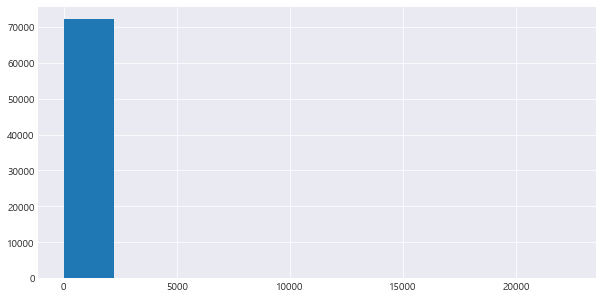

In [10]:
plt.figure(figsize=(10,5))
df['trip_duration_min'].hist()
plt.show()

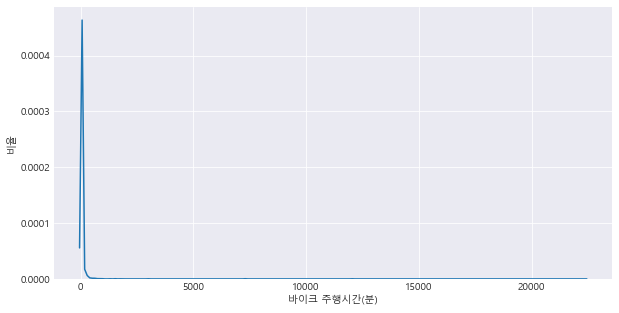

In [11]:
plt.figure(figsize=(10,5))
kde=sns.kdeplot(df['trip_duration_min'])
kde.set_xlabel("바이크 주행시간(분)")
kde.set_ylabel("비율")
plt.show()

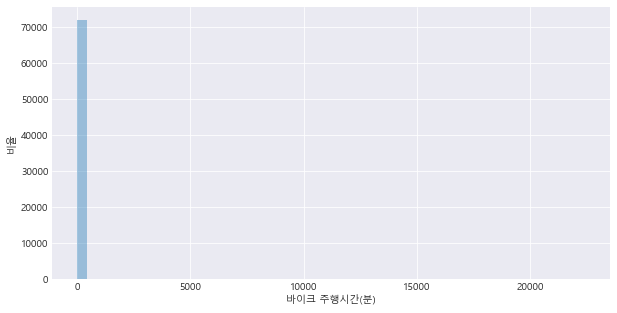

In [12]:
plt.figure(figsize=(10,5))
dist=sns.distplot(df['trip_duration_min'],kde=False)
dist.set_xlabel("바이크 주행시간(분)")
dist.set_ylabel("비율")
plt.show()

In [13]:
df['trip_duration_min'].skew() #치우침

116.00262442002963

In [14]:
df['trip_duration_min'].kurt() #뾰족함

15913.196644227899

In [15]:
#이상치 제거 : 최상위 1% 제거
cut_point=df['trip_duration_min'].quantile(0.99)
df1=df[df['trip_duration_min']<cut_point]

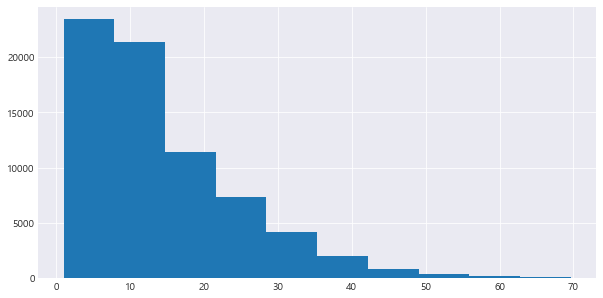

In [16]:
plt.figure(figsize=(10,5))
df1['trip_duration_min'].hist()
plt.show()

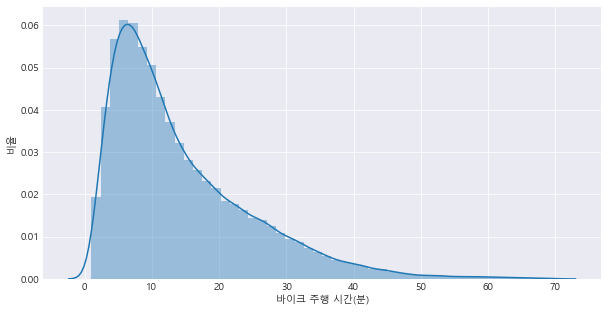

In [19]:
# seaborn의 distplot, shade 연한 하늘색 네모가 histogram
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(df1['trip_duration_min'],kde=True) # kde=False:선그래프 제거
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

In [20]:
#skewness and kurtosis
print("Skewness: %f" % df1['trip_duration_min'].skew())
print("Kurtosis: %f" % df1['trip_duration_min'].kurt())

Skewness: 1.418011
Kurtosis: 2.307984


In [23]:
df1['start_hour'].value_counts()

18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
2       77
4       77
3       66
Name: start_hour, dtype: int64

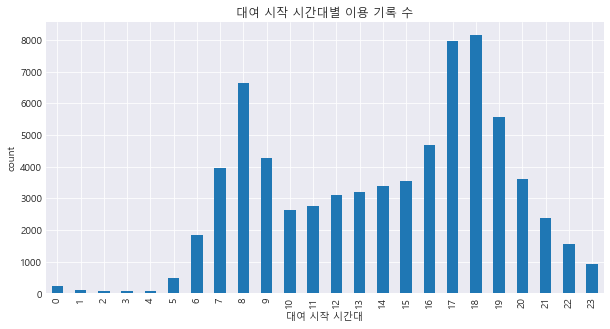

In [22]:
plt.figure(figsize=(10,5))
df1['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

주로 오후 5-6시가 가장 많은 대여건수를 보였고, 그 다음은 오전 8시가 많았다. 뉴욕 기준 퇴근과 출근 시간대의 양상을 반영하고 있다. 새벽 시간대 특히 0-4시에서 대여건수가 낮다.

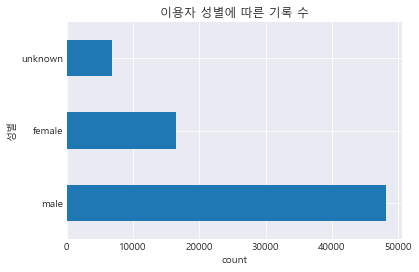

In [23]:
plt.figure()
df1['gender'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('성별')
plt.title('이용자 성별에 따른 기록 수')
plt.show() # 캔버스를 보여준다

남성 사용자 48310명으로, 여성 사용자 16568명에 비해 3배가량 많았다.

In [24]:
df1['start_station_name'].value_counts().nlargest(10)

Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: start_station_name, dtype: int64

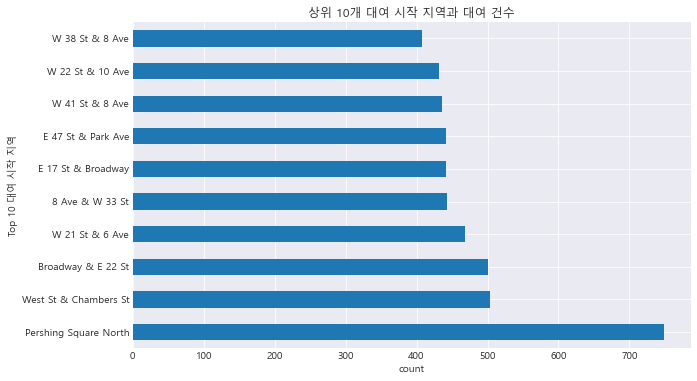

In [25]:
plt.figure(figsize=(10,6))
df1['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

In [24]:
df1.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register,trip_duration_min
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36,6.500000
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29,14.233333
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55,8.766667
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32,14.750000
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34,5.400000


In [25]:
#주행시간이 24시간(1440분) 이상인 데이터들은 제거
df2=df[df['trip_duration_min']<1440] 

<Figure size 720x360 with 0 Axes>

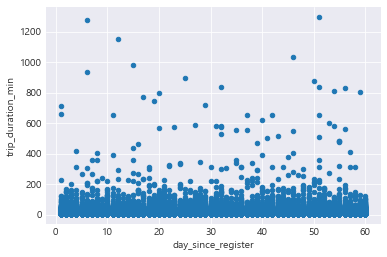

In [26]:
#연속형-연속형: 신규가입자(day_since_register)일수록 주행시간(trip_duration)이 더 짧을까?
plt.figure(figsize=(10,5))
df2.plot.scatter(x='day_since_register',y='trip_duration_min')
plt.show()

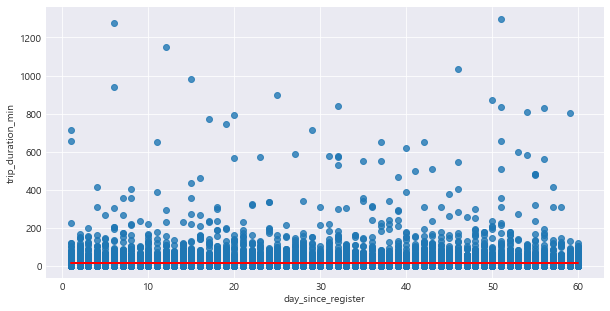

In [27]:
plt.figure(figsize=(10,5))
reg=sns.regplot(x=df2['day_since_register'],y=df2['trip_duration_min'],
                line_kws={"color":"red","lw":2})
plt.show()

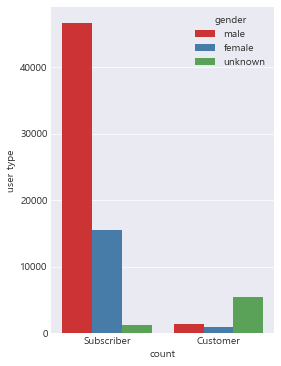

In [30]:
#범주형-범주형 countplot
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='usertype',hue='gender',data=df1, palette='Set1') #palette: 색 셋트
cnt.set_xlabel("count")
cnt.set_ylabel('user type')
plt.show()

구독자 중에서는 남자가 많고, 구독자가 아닌 사람 중에서는 성별을 등록하지 않는 사람이 많다.

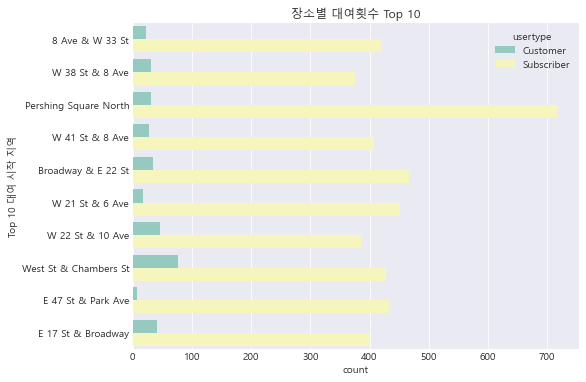

In [37]:
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df1['start_station_name'].value_counts().nlargest(10).index
df_top=df1[df1['start_station_name'].isin(top_list)]
# 상위 대여시작지점 별 usertype 분포
plt.figure(figsize=(8,6))
cnt=sns.countplot(y='start_station_name',hue='usertype',data=df_top,palette='Set3') #변수명이 길어서 y축으로 변경
cnt.set_xlabel("count")
cnt.set_ylabel("Top 10 대여 시작 지역")
plt.title('장소별 대여횟수 Top 10')
plt.show()

In [33]:
df_top.groupby('start_station_name').size().sort_values()

start_station_name
W 38 St & 8 Ave          407
W 22 St & 10 Ave         431
W 41 St & 8 Ave          436
E 47 St & Park Ave       441
E 17 St & Broadway       442
8 Ave & W 33 St          443
W 21 St & 6 Ave          468
Broadway & E 22 St       501
West St & Chambers St    504
Pershing Square North    749
dtype: int64

In [34]:
df_top.start_station_name.value_counts().sort_values()

W 38 St & 8 Ave          407
W 22 St & 10 Ave         431
W 41 St & 8 Ave          436
E 47 St & Park Ave       441
E 17 St & Broadway       442
8 Ave & W 33 St          443
W 21 St & 6 Ave          468
Broadway & E 22 St       501
West St & Chambers St    504
Pershing Square North    749
Name: start_station_name, dtype: int64

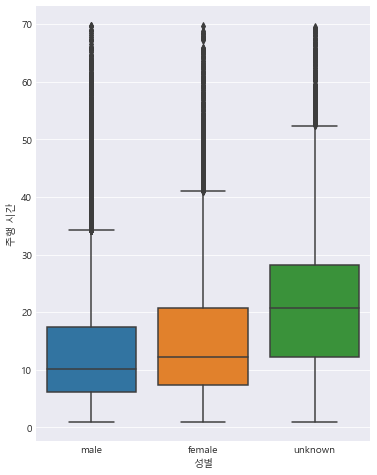

In [32]:
#범주형-연속형
# 성별 gender 와 주행 시간 trip_duration
plt.figure(figsize=(6,8))
box=sns.boxplot(x='gender',y='trip_duration_min',data=df1)
box.set_xlabel("성별")
box.set_ylabel("주행 시간")
plt.show()

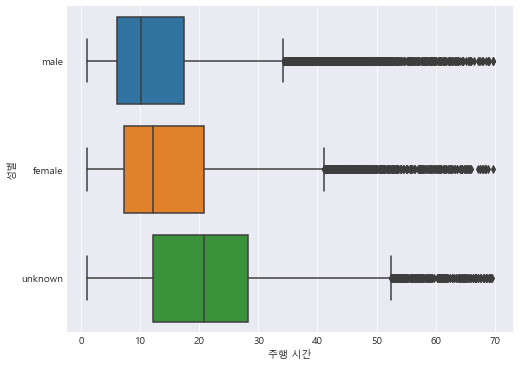

In [35]:
plt.figure(figsize=(8,6))
box=sns.boxplot(x='trip_duration_min',y='gender',data=df1)
box.set_xlabel("주행 시간")
box.set_ylabel("성별")
plt.show()

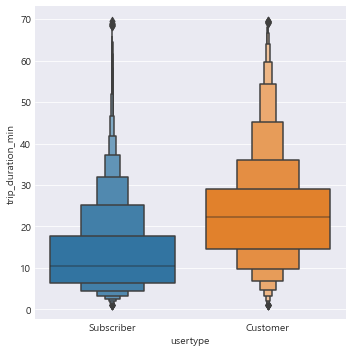

In [33]:
# Usertype 과 주행 시간 trip_duration
sns.catplot(x='usertype',y='trip_duration_min', kind='boxen',data=df1)
plt.show()

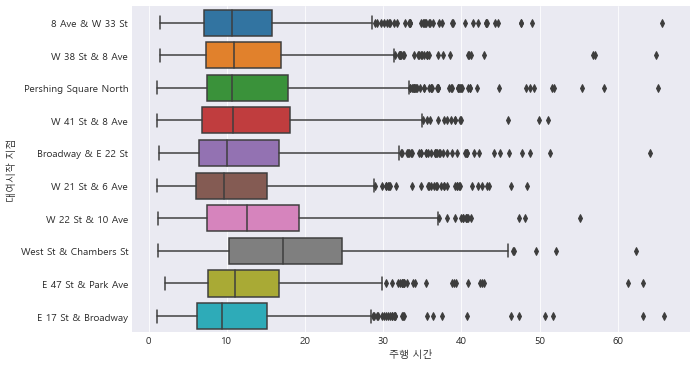

In [34]:
#범주형 변수 고유값이 많을때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화
# 상위 10개 시작 지점으로 시작된 기록 건수만 남겨 df_top으로 생성
top_list=df1['start_station_name'].value_counts().nlargest(10).index
df_top=df1[df1['start_station_name'].isin(top_list)]
plt.figure(figsize=(10,6))
box=sns.boxplot(y='start_station_name',x='trip_duration_min',data=df_top)
box.set_xlabel("주행 시간")
box.set_ylabel("대여시작 지점")
plt.show()

West St & Chambers St가 주행시간 평균이 높음. 건수도 상위 2위(33~34행 참고)이므로 바이크를 더 비치해두자.

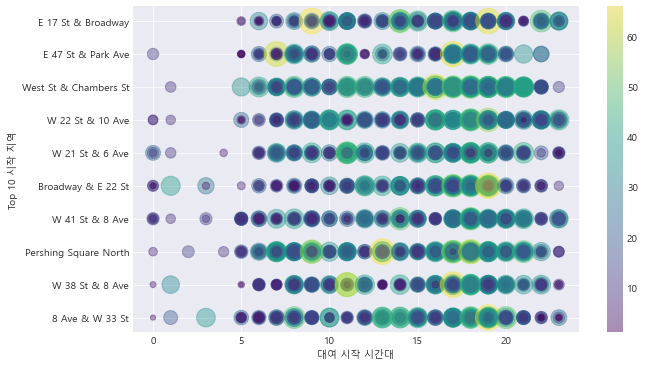

In [46]:
#3개 이상의 변수 분석 : 버블차트
plt.figure(figsize=(10,6))
plt.scatter(df_top['start_hour'],  #x축
            df_top['start_station_name'], #y축
            c=df_top['trip_duration_min'],  #색상
            s=10*df_top['trip_duration_min'], # 10을 곱해본 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.4, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

In [47]:
#3개 이상의 변수 분석 : 히트맵, 핵심은 groupby
base=df_top.groupby(['start_station_name','start_hour'])['bike_id'].count().unstack()
base

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
8 Ave & W 33 St,1.0,1.0,NaN,1.0,NaN,12.0,23.0,21.0,45.0,34.0,...,9.0,19.0,23.0,53.0,53.0,48.0,17.0,21.0,15.0,5.0
Broadway & E 22 St,5.0,1.0,NaN,2.0,NaN,1.0,5.0,9.0,32.0,16.0,...,26.0,20.0,30.0,74.0,133.0,67.0,15.0,8.0,6.0,1.0
E 17 St & Broadway,NaN,NaN,NaN,NaN,NaN,2.0,7.0,11.0,17.0,26.0,...,30.0,21.0,36.0,56.0,54.0,41.0,28.0,7.0,16.0,9.0
E 47 St & Park Ave,1.0,NaN,NaN,NaN,NaN,5.0,11.0,36.0,34.0,14.0,...,6.0,12.0,34.0,116.0,97.0,30.0,8.0,1.0,2.0,NaN
Pershing Square North,1.0,NaN,1.0,NaN,1.0,6.0,9.0,57.0,99.0,72.0,...,17.0,27.0,39.0,100.0,128.0,62.0,20.0,18.0,9.0,3.0
W 21 St & 6 Ave,3.0,1.0,NaN,NaN,1.0,NaN,9.0,22.0,30.0,29.0,...,17.0,23.0,30.0,46.0,71.0,34.0,20.0,22.0,2.0,8.0
W 22 St & 10 Ave,2.0,1.0,NaN,NaN,NaN,4.0,3.0,20.0,35.0,32.0,...,19.0,13.0,34.0,30.0,65.0,28.0,29.0,23.0,26.0,8.0
W 38 St & 8 Ave,1.0,1.0,NaN,NaN,NaN,2.0,20.0,8.0,37.0,42.0,...,18.0,17.0,17.0,53.0,61.0,43.0,11.0,10.0,9.0,4.0
W 41 St & 8 Ave,5.0,1.0,NaN,2.0,NaN,38.0,29.0,10.0,21.0,31.0,...,16.0,14.0,11.0,51.0,76.0,42.0,25.0,16.0,7.0,7.0


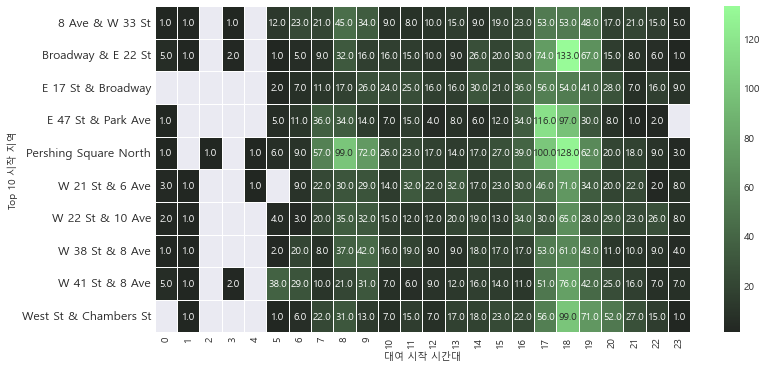

In [48]:
fig, ax=plt.subplots(figsize=(12,6))
pal = sns.dark_palette("palegreen",as_cmap=True) #color paletter 설정
sns.heatmap(base, 
            annot=True, # 셀에 숫자 표기
            ax=ax, # 위에서 만들어 둔 캔버스의 (Matplotlib) Axes
            linewidths=.5, # 셀을 나눌 선의 너비
            fmt='.1f', # 소수점 자리 처리
            cmap=pal) 
plt.ylabel('Top 10 시작 지역')
plt.xlabel('대여 시작 시간대')
plt.xticks(rotation=90)  # x label 돌려주기
plt.yticks(fontsize=12)
plt.show()

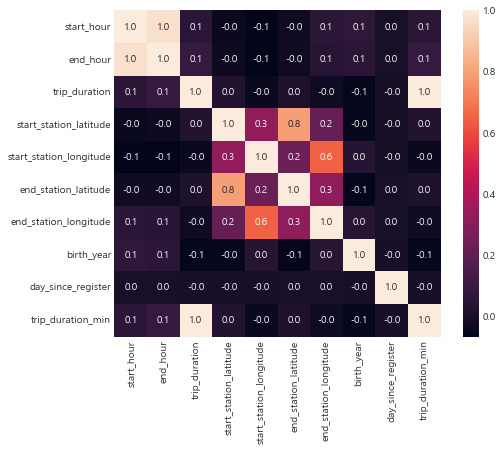

In [85]:
def draw_corrmat(df):
    y_corrmat=df.corr()
    f, ax=plt.subplots(figsize=(8,6))
    sns.heatmap(y_corrmat, vmax=1, annot=True, fmt='.1f',square=True);
draw_corrmat(df1)

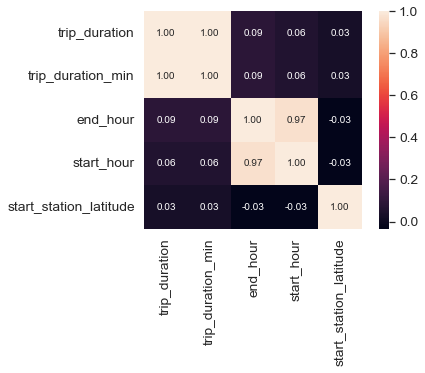

In [91]:
#df=data frame, y=주요하게 보고자하는 값, k=y값으로부터 상관관계가 강한 top k개

def draw_top_corrmat(df,y,k):
    y_corrmat=df.corr()
    y_cols=y_corrmat.nlargest(k,y)[y].index
    cm=np.corrcoef(df[y_cols].values.T)
    sns.set(font_scale=1.25)
    f, ax=plt.subplots(figsize=(6,4))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=y_cols.values, xticklabels=y_cols.values)
    plt.show()
draw_top_corrmat(df1,'trip_duration_min',5)